In [1]:
# === CELL 1: Create SQLite DB and insert sample data ===
import sqlite3

# Create (or open) a SQLite database file
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table (idempotent)
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Optional: start clean each run
cursor.execute("DELETE FROM sales;")

# Insert sample rows
data = [
    ("Headphones", 30, 50.0),
    ("Keyboard", 20, 40.0),
    ("Mouse", 50, 25.0),
    ("Monitor", 15, 150.0),
    ("Webcam", 25, 70.0)
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)

conn.commit()
conn.close()

print("Database created and sample data inserted ✅")


Database created and sample data inserted ✅


In [2]:
# === CELL 2: Run SQL and view results as a table ===
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

print("Query results:")
df


Query results:


,product,total_qty,revenue
0,Monitor,15,2250.0
1,Webcam,25,1750.0
2,Headphones,30,1500.0
3,Mouse,50,1250.0
4,Keyboard,20,800.0


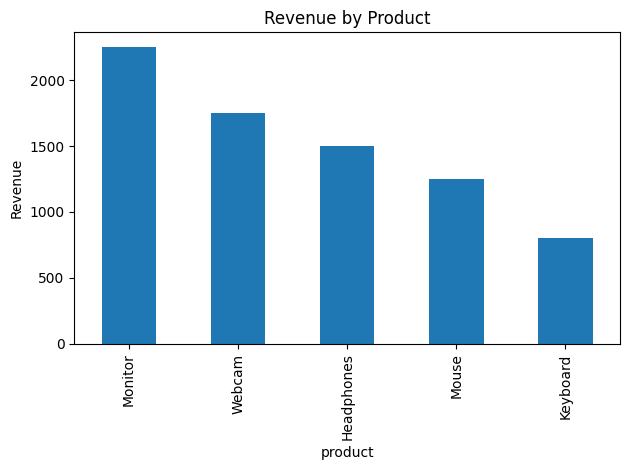

Saved chart as sales_chart.png ✅


In [3]:
# === CELL 3: Plot the chart ===
import matplotlib.pyplot as plt

ax = df.plot(kind='bar', x='product', y='revenue', legend=False)
ax.set_ylabel("Revenue")
ax.set_title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # saved to working directory
plt.show()

print("Saved chart as sales_chart.png ✅")


In [4]:
# === CELL 4: Add your own data, then rerun CELLS 2 and 3 ===
import sqlite3
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

# Example new rows
new_rows = [
    ("Laptop", 10, 800.0),
    ("SSD", 40, 90.0)
]
cur.executemany("INSERT INTO sales VALUES (?, ?, ?)", new_rows)
conn.commit()
conn.close()

print("Added custom rows. Re-run CELL 2 and CELL 3 to refresh outputs.")


Added custom rows. Re-run CELL 2 and CELL 3 to refresh outputs.


In [5]:
# === CELL 2: Run SQL and view results as a table ===
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

print("Query results:")
df


Query results:


,product,total_qty,revenue
0,Laptop,10,8000.0
1,SSD,40,3600.0
2,Monitor,15,2250.0
3,Webcam,25,1750.0
4,Headphones,30,1500.0
5,Mouse,50,1250.0
6,Keyboard,20,800.0


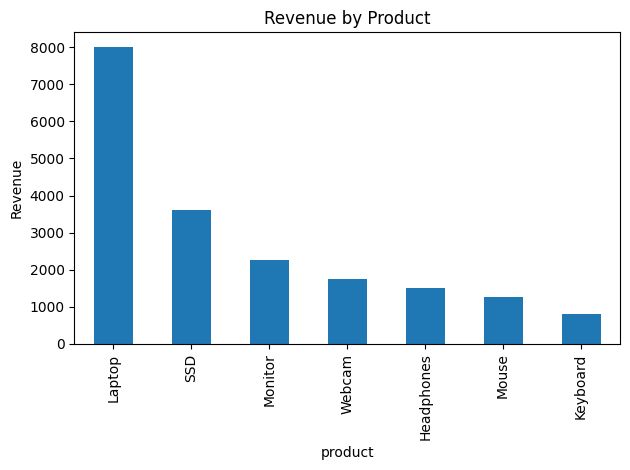

Saved chart as sales_chart.png ✅


In [6]:
# === CELL 3: Plot the chart ===
import matplotlib.pyplot as plt

ax = df.plot(kind='bar', x='product', y='revenue', legend=False)
ax.set_ylabel("Revenue")
ax.set_title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # saved to working directory
plt.show()

print("Saved chart as sales_chart.png ✅")
